# RFM Analysis on Online Retail Data Set

In [1]:
import sqlite3
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
file = open("C:\\DataSets\\OnlineRetail2Sample.csv")
data1 = file.readlines()
data = data1[1:]

In [12]:
conn = sqlite3.connect('C:\\DataSets\\RFMDB.db')
print ("Opened database successfully")
cursor = conn.cursor()
cursor.execute('''DROP TABLE IF EXISTS RFMDM_TEMP''')
conn.commit()
conn.close()
print("table got deleted if exists")

Opened database successfully
table got deleted if exists


In [13]:
conn = sqlite3.connect('C:\\DataSets\\RFMDB.db')
print ("Opened database successfully")
conn.execute('''CREATE TABLE RFMDM_TEMP (
    InvoiceNo   CHAR (20),
    StockCode   CHAR (20),
    Quantity    INTEGER,
    DoP         DATE,
    UnitPrice   FLOAT,
    CustomerID  CHAR (30));''')
print ("Table created successfully")

conn.close()

Opened database successfully
Table created successfully


In [14]:
conn = sqlite3.connect('C:\\DataSets\\RFMDB.db')
print ("Opened database successfully")

Opened database successfully


In [15]:
for row in data:
    #iData = data[row].split(sep = ",")
    iData = row.split(sep = ",")
    #print(iData)
    InvoiceNo = iData[0]
    StockCode = iData[1]
    Quantity = iData[2]
    DoP = iData[3]
    UnitPrice = iData[4]
    CustomerID = iData[5]

    #print(InvoiceNo, StockCode, Quantity, DoP, UnitPrice, CustomerID)

    #sql = 'INSERT INTO RFMDM (InvoiceNo,StockCode,Quantity,DoP,UnitPrice,CustomerID) \
    #      VALUES (' + 536365 , 71053, 6, \'12/1/2010\', 3.39, 17850)"
    sql = "INSERT INTO RFMDM_TEMP (InvoiceNo,StockCode,Quantity,DoP,UnitPrice,CustomerID) \
          VALUES (" + "\'" + InvoiceNo + "\',\'"+ StockCode + "\',"+ Quantity  + ','+ "\'" + DoP + "\'" +','+ UnitPrice +',' + CustomerID + " )"
    #print(sql)
    conn.execute(sql)
conn.commit()    
conn.close()
print("Commit successful,records inserted into the table")

Commit successful,records inserted into the table


In [16]:
conn = sqlite3.connect('C:\\DataSets\\RFMDB.db')
print ("Opened database successfully")
cur = conn.execute("select * from RFMDM_TEMP limit 5")
data = cur.fetchall()
conn.close()
print(data)

Opened database successfully
[('536365', '85123A', 6, '12/1/2010', 2.55, '17850'), ('536365', '71053', 6, '12/1/2010', 3.39, '17850'), ('536365', '84406B', 8, '12/1/2010', 2.75, '17850'), ('536365', '84029G', 6, '12/1/2010', 3.39, '17850'), ('536365', '84029E', 6, '12/1/2010', 3.39, '17850')]


#data cleaning
#Run delete query in the table rfmdm
select count(*) from RFMDM_TEMP
-- 406829

select count(*) from RFMDM_TEMP where StockCode in ('POST', 'D', 'BANK CHARGES', 'C2', 'CRUK', 'DOT', 'M', 'PADS')

--1920

delete from rfmdm_temp where StockCode in ('POST', 'D', 'BANK CHARGES', 'C2', 'CRUK', 'DOT', 'M', 'PADS')

--select count(*) from RFMDM_TEMP where Quantity<0

--8359 (2%)

--delete from RFMDM_TEMP where quantity <0

In [218]:
conn = sqlite3.connect('C:\\DataSets\\RFMDB.db')
print ("Opened database successfully")
rfmdm = pd.read_sql("select * from RFMDM_TEMP",conn)
print ("records added to dataframe successfully")
conn.close()

Opened database successfully
records added to dataframe successfully


In [219]:
rfmdm.head()

,InvoiceNo,StockCode,Quantity,DoP,UnitPrice,CustomerID
0,536365,85123A,6,12/1/2010,2.55,17850
1,536365,71053,6,12/1/2010,3.39,17850
2,536365,84406B,8,12/1/2010,2.75,17850
3,536365,84029G,6,12/1/2010,3.39,17850
4,536365,84029E,6,12/1/2010,3.39,17850


In [220]:
rfmdm.dtypes

InvoiceNo      object
StockCode      object
Quantity        int64
DoP            object
UnitPrice     float64
CustomerID     object
dtype: object

In [221]:
rfmdm.describe()

,Quantity,UnitPrice
count,404909.000000,404909.000000
mean,12.105799,2.901129
std,249.237543,4.430846
min,-80995.000000,0.000000
25%,2.000000,1.250000
50%,5.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,649.500000


In [222]:
conn = sqlite3.connect('C:\\DataSets\\RFMDB.db')
print ("Opened database successfully")
cur = conn.execute("select count(*) from RFMDM_TEMP")
data = cur.fetchall()
conn.close()
print(data)

Opened database successfully
[(404909,)]


In [223]:
rfmdm['DoP'] = pd.to_datetime(rfmdm['DoP'])
print("Converted successfully")

Converted successfully


In [224]:
rfmdm.dtypes

InvoiceNo             object
StockCode             object
Quantity               int64
DoP           datetime64[ns]
UnitPrice            float64
CustomerID            object
dtype: object

In [25]:
#Fix datetime format issue and create the new table RFMDM with dateformat fixed

In [225]:
rfmdm['Year'] = rfmdm['DoP'].dt.year
rfmdm['Month'] = rfmdm['DoP'].dt.month
rfmdm['TM_Id'] = rfmdm['Year'].astype(str) + '_' + rfmdm['Month'].astype(str)
rfmdm['Revenue'] = rfmdm['Quantity'] * rfmdm['UnitPrice']
rfmdm.tail()

,InvoiceNo,StockCode,Quantity,DoP,UnitPrice,CustomerID,Year,Month,TM_Id,Revenue
404904,581587,22613,12,2011-12-09,0.85,12680,2011,12,2011_12,10.20
404905,581587,22899,6,2011-12-09,2.10,12680,2011,12,2011_12,12.60
404906,581587,23254,4,2011-12-09,4.15,12680,2011,12,2011_12,16.60
404907,581587,23255,4,2011-12-09,4.15,12680,2011,12,2011_12,16.60
404908,581587,22138,3,2011-12-09,4.95,12680,2011,12,2011_12,14.85


In [226]:
conn = sqlite3.connect('C:\\DataSets\\RFMDB.db')
print ("Opened database successfully")
cursor = conn.cursor()
cursor.execute('''DROP TABLE IF EXISTS RFMDM''')
conn.commit()
rfmdm.to_sql('RFMDM',conn,if_exists = 'replace')
#rfmdm = pd.read_sql("select * from RFMDM",conn)
print ("new table got created successfully")
conn.close()

Opened database successfully
new table got created successfully


In [227]:
conn = sqlite3.connect('C:\\DataSets\\RFMDB.db')
print ("Opened database successfully")
cur = conn.execute("select * from RFMDM limit 5")
data = cur.fetchall()
conn.close()
print(data)

Opened database successfully
[(0, '536365', '85123A', 6, '2010-12-01 00:00:00', 2.55, '17850', 2010, 12, '2010_12', 15.299999999999999), (1, '536365', '71053', 6, '2010-12-01 00:00:00', 3.39, '17850', 2010, 12, '2010_12', 20.34), (2, '536365', '84406B', 8, '2010-12-01 00:00:00', 2.75, '17850', 2010, 12, '2010_12', 22.0), (3, '536365', '84029G', 6, '2010-12-01 00:00:00', 3.39, '17850', 2010, 12, '2010_12', 20.34), (4, '536365', '84029E', 6, '2010-12-01 00:00:00', 3.39, '17850', 2010, 12, '2010_12', 20.34)]


In [231]:
conn = sqlite3.connect('C:\\DataSets\\RFMDB.db')
print ("Opened database successfully")
cursor = conn.cursor()
#cursor.execute('''DROP TABLE IF EXISTS RFMSEGMENTATION''')
#conn.commit()
conn.execute('''CREATE TABLE RFMSEGMENTATION (
    CustomerID  CHAR (20),
    RDate   DATE,
    Frequency    INTEGER,
    Product INTEGER,
    TDate         DATE,
    Monetary   FLOAT)''')
print ("Table created successfully")

conn.close()

Opened database successfully
Table created successfully


In [ ]:
insert data into rfmseg table using the following sql command
    INSERT INTO RFMSEGMENTATION
       SELECT CustomerID, max(DoP), count(distinct(InvoiceNo)), count(distinct(StockCode)), min(DoP), sum(quantity*unitprice)
       FROM RFMDM
       group by customerid

In [232]:
conn = sqlite3.connect('C:\\DataSets\\RFMDB.db')
print ("Opened database successfully")
cur = conn.execute("select * from RFMSEGMENTATION limit 5")
data = cur.fetchall()
conn.close()
print(data)

Opened database successfully
[('12346', '2011-01-18 00:00:00', 2, 1, '2011-01-18 00:00:00', 0.0), ('12347', '2011-12-07 00:00:00', 7, 103, '2010-12-07 00:00:00', 4309.999999999997), ('12348', '2011-09-25 00:00:00', 4, 21, '2010-12-16 00:00:00', 1437.24), ('12349', '2011-11-21 00:00:00', 1, 72, '2011-11-21 00:00:00', 1457.55), ('12350', '2011-02-02 00:00:00', 1, 16, '2011-02-02 00:00:00', 294.40000000000003)]


In [233]:
print(max(rfmdm['DoP']))

2011-12-09 00:00:00


In [234]:
print(min(rfmdm['DoP']))

2010-12-01 00:00:00


## Do customer base analysis and segmentation..Start>>

In [239]:
conn = sqlite3.connect('C:\\DataSets\\RFMDB.db')
print ("Opened database successfully")
rfmsegmentation = pd.read_sql("select * from RFMSEGMENTATION",conn)
print ("records added to dataframe rfmseg successfully")
conn.close()

Opened database successfully
records added to dataframe rfmseg successfully


In [240]:
rfmsegmentation.head()
#print(rfmseg['Recency'])

,CustomerID,RDate,Frequency,Product,TDate,Monetary
0,12346,2011-01-18 00:00:00,2,1,2011-01-18 00:00:00,0.00
1,12347,2011-12-07 00:00:00,7,103,2010-12-07 00:00:00,4310.00
2,12348,2011-09-25 00:00:00,4,21,2010-12-16 00:00:00,1437.24
3,12349,2011-11-21 00:00:00,1,72,2011-11-21 00:00:00,1457.55
4,12350,2011-02-02 00:00:00,1,16,2011-02-02 00:00:00,294.40


In [241]:

NOW = dt.datetime(2011,12,10)
print(NOW)

2011-12-10 00:00:00


In [242]:
rfmsegmentation['NOW'] = NOW
#rfmseg.head()

In [243]:
rfmsegmentation.dtypes

CustomerID            object
RDate                 object
Frequency              int64
Product                int64
TDate                 object
Monetary             float64
NOW           datetime64[ns]
dtype: object

In [244]:
#convert to datetime format
#rfmseg['NOW'] = pd.to_datetime(rfmseg['NOW'])
rfmsegmentation['TDate'] = pd.to_datetime(rfmsegmentation['TDate'])
rfmsegmentation['RDate'] = pd.to_datetime(rfmsegmentation['RDate'])
rfmsegmentation.head()

,CustomerID,RDate,Frequency,Product,TDate,Monetary,NOW
0,12346,2011-01-18,2,1,2011-01-18,0.00,2011-12-10
1,12347,2011-12-07,7,103,2010-12-07,4310.00,2011-12-10
2,12348,2011-09-25,4,21,2010-12-16,1437.24,2011-12-10
3,12349,2011-11-21,1,72,2011-11-21,1457.55,2011-12-10
4,12350,2011-02-02,1,16,2011-02-02,294.40,2011-12-10


In [245]:
rfmsegmentation.dtypes

CustomerID            object
RDate         datetime64[ns]
Frequency              int64
Product                int64
TDate         datetime64[ns]
Monetary             float64
NOW           datetime64[ns]
dtype: object

In [246]:
rfmsegmentation['Recency'] = (rfmsegmentation['NOW'] - rfmsegmentation['RDate']).dt.days
rfmsegmentation['Tenure'] = (rfmsegmentation['NOW'] - rfmsegmentation['TDate']).dt.days
rfmsegmentation.head()

,CustomerID,RDate,Frequency,Product,TDate,Monetary,NOW,Recency,Tenure
0,12346,2011-01-18,2,1,2011-01-18,0.00,2011-12-10,326,326
1,12347,2011-12-07,7,103,2010-12-07,4310.00,2011-12-10,3,368
2,12348,2011-09-25,4,21,2010-12-16,1437.24,2011-12-10,76,359
3,12349,2011-11-21,1,72,2011-11-21,1457.55,2011-12-10,19,19
4,12350,2011-02-02,1,16,2011-02-02,294.40,2011-12-10,311,311


In [247]:
del rfmsegmentation['NOW']
#rfmseg.head()

In [282]:
rfmsegmentation.describe()

,Frequency,Product,Monetary,Recency,Tenure,R_Quartile,F_Quartile,M_Quartile
count,4363.000000,4363.000000,4363.000000,4363.000000,4363.000000,4363.000000,4363.000000,4363.000000
mean,4.993812,61.171442,1899.303993,92.689892,226.226450,3.011231,2.801513,3.000000
std,9.083984,85.362484,8265.313802,100.968201,118.474897,1.420235,1.536959,1.414538
min,1.000000,1.000000,-1192.200000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,15.000000,294.205000,17.000000,115.000000,2.000000,1.000000,2.000000
50%,3.000000,35.000000,645.650000,51.000000,254.000000,3.000000,3.000000,3.000000
75%,5.000000,77.000000,1594.980000,144.000000,332.000000,4.000000,4.000000,4.000000
max,242.000000,1791.000000,278778.020000,374.000000,374.000000,5.000000,5.000000,5.000000


In [250]:
import matplotlib.pyplot as plt
rfmsegall.hist(figsize = (10,20))
#plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001ADB5BA8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000001DCD3BA8>]], dtype=object)

In [251]:
quantiles = rfmsegmentation.quantile(q=[0.2,0.4,0.6,0.8])
quantiles

,Frequency,Product,Monetary,Recency,Tenure
0.2,1.0,12.0,235.032,12.0,82.0
0.4,2.0,26.0,463.030,32.0,211.8
0.6,3.0,48.0,899.928,71.0,284.2
0.8,6.6,92.0,1994.120,180.0,359.0


In [252]:
quantiles = quantiles.to_dict()
quantiles

{'Frequency': {0.2: 1.0, 0.4: 2.0, 0.6: 3.0, 0.8: 6.600000000000364},
 'Monetary': {0.2: 235.0320000000001,
  0.4: 463.03,
  0.6: 899.9279999999997,
  0.8: 1994.1200000000022},
 'Product': {0.2: 12.0, 0.4: 26.0, 0.6: 48.0, 0.8: 92.0},
 'Recency': {0.2: 12.0, 0.4: 32.0, 0.6: 71.0, 0.8: 180.0},
 'Tenure': {0.2: 82.0,
  0.4: 211.80000000000018,
  0.6: 284.1999999999998,
  0.8: 359.0}}

In [253]:
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def RClass(x,p,d):
    if x <= d[p][0.2]:
        return 5
    elif x <= d[p][0.4]:
        return 4
    elif x <= d[p][0.6]: 
        return 3
    elif x <= d[p][0.8]: 
        return 2
    else:
        return 1
    
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FMClass(x,p,d):
    if x <= d[p][0.2]:
        return 1
    elif x <= d[p][0.4]:
        return 2
    elif x <= d[p][0.6]: 
        return 3
    elif x <= d[p][0.8]: 
        return 4
    else:
        return 5

In [254]:
rfmsegmentation['R_Quartile'] = rfmsegmentation['Recency'].apply(RClass, args=('Recency',quantiles,))
rfmsegmentation['F_Quartile'] = rfmsegmentation['Frequency'].apply(FMClass, args=('Frequency',quantiles,))
rfmsegmentation['M_Quartile'] = rfmsegmentation['Monetary'].apply(FMClass, args=('Monetary',quantiles,))

In [255]:
rfmsegmentation['RFMClass'] = rfmsegmentation.R_Quartile.map(str) \
                            + rfmsegmentation.F_Quartile.map(str) \
                            + rfmsegmentation.M_Quartile.map(str)

In [256]:
rfmsegmentation.head()

,CustomerID,RDate,Frequency,Product,TDate,Monetary,Recency,Tenure,R_Quartile,F_Quartile,M_Quartile,RFMClass
0,12346,2011-01-18,2,1,2011-01-18,0.00,326,326,1,2,1,121
1,12347,2011-12-07,7,103,2010-12-07,4310.00,3,368,5,5,5,555
2,12348,2011-09-25,4,21,2010-12-16,1437.24,76,359,2,4,4,244
3,12349,2011-11-21,1,72,2011-11-21,1457.55,19,19,4,1,4,414
4,12350,2011-02-02,1,16,2011-02-02,294.40,311,311,1,1,2,112


#refer to http://www.blastam.com/blog/rfm-analysis-boosts-sales
https://www.putler.com/rfm-analysis/
https://medium.com/@jackiekhuu.work/customer-segmentation-rfm-analysis-8007d62101cc

In [258]:
#drop the table RFMSEGMENTATION and create it again with new table structure
conn = sqlite3.connect('C:\\DataSets\\RFMDB.db')
print ("Opened database successfully")
cursor = conn.cursor()
cursor.execute('''DROP TABLE RFMSEGMENTATION''')
conn.commit()
rfmsegmentation.to_sql('RFMSEGMENTATION',conn, if_exists = 'replace')
#rfmdm = pd.read_sql("select * from RFMDM",conn)
print ("new table got created successfully")
conn.close()

Opened database successfully
new table got created successfully


In [259]:
conn = sqlite3.connect('C:\\DataSets\\RFMDB.db')
print ("Opened database successfully")

sql = ''' alter table RFMSEGMENTATION \
            add column Segment VARCHAR(50) \
        '''
print(sql)
conn.execute(sql)
conn.commit
print ("Column added successfully")

conn.close()

Opened database successfully
 alter table RFMSEGMENTATION             add column Segment VARCHAR(50)         
Column added successfully


<img src="C:\\DataSets\\RFM_Segmentation.png">

#run the following sql queries


update rfmsegmentation set Segment = "Champions" where R_Quartile in (4,5) and F_Quartile in (4,5) and M_Quartile in (4,5)

update rfmsegmentation set Segment = "Loyal Customers" where R_Quartile in (2,3,4,5) and F_Quartile in (3,4,5) and M_Quartile in (3,4,5)

update rfmsegmentation set Segment = "Potential Loyalist" where R_Quartile in (3,4,5) and F_Quartile in (1,2,3) and M_Quartile in (1,2,3)


update rfmsegmentation set Segment = "New Customers" where R_Quartile in (4,5) and F_Quartile = 1 and M_Quartile = 1

update rfmsegmentation set Segment = "Promising" where R_Quartile in (2,4) and F_Quartile = 1 and M_Quartile = 1

update rfmsegmentation set Segment = "Customer Needing Attention" where R_Quartile in (2,3) and F_Quartile in (2,3) and M_Quartile in (2,3)

update rfmsegmentation set Segment = "About To Sleep" where R_Quartile in (2,3) and F_Quartile in (1,2) and M_Quartile in (1,2)

update rfmsegmentation set Segment = "At Risk" where R_Quartile in (1,2) and F_Quartile in (2,3,4,5) and M_Quartile in (2,3,4,5)

update rfmsegmentation set Segment = "Can't Lose Them" where R_Quartile = 1 and F_Quartile in (4,5) and M_Quartile in (4,5)

update rfmsegmentation set Segment = "Lost" where R_Quartile in (1,2) and F_Quartile in (1,2) and M_Quartile in (1,2)

select count(*) from rfmsegmentation where Segment is null -- 289

In [263]:
conn = sqlite3.connect('C:\\DataSets\\RFMDB.db')
print ("Opened database successfully")
cur = conn.execute("select * from RFMSEGMENTATION limit 5")
data = cur.fetchall()
conn.close()
print(data)

Opened database successfully
[(0, '12346', '2011-01-18 00:00:00', 2, 1, '2011-01-18 00:00:00', 0.0, 326, 326, 1, 2, 1, '121', 'Lost'), (1, '12347', '2011-12-07 00:00:00', 7, 103, '2010-12-07 00:00:00', 4309.999999999997, 3, 368, 5, 5, 5, '555', 'Loyal Customers'), (2, '12348', '2011-09-25 00:00:00', 4, 21, '2010-12-16 00:00:00', 1437.24, 76, 359, 2, 4, 4, '244', 'At Risk'), (3, '12349', '2011-11-21 00:00:00', 1, 72, '2011-11-21 00:00:00', 1457.55, 19, 19, 4, 1, 4, '414', None), (4, '12350', '2011-02-02 00:00:00', 1, 16, '2011-02-02 00:00:00', 294.40000000000003, 311, 311, 1, 1, 2, '112', 'Lost')]


In [264]:
#drop the df and create again, sot that Segment column can be added again
rfmsegmentation.drop

<bound method NDFrame.drop of      CustomerID      RDate  Frequency  Product      TDate      Monetary  \
0         12346 2011-01-18          2        1 2011-01-18  0.000000e+00   
1         12347 2011-12-07          7      103 2010-12-07  4.310000e+03   
2         12348 2011-09-25          4       21 2010-12-16  1.437240e+03   
3         12349 2011-11-21          1       72 2011-11-21  1.457550e+03   
4         12350 2011-02-02          1       16 2011-02-02  2.944000e+02   
5         12352 2011-11-03          8       57 2011-02-16  1.265410e+03   
6         12353 2011-05-19          1        4 2011-05-19  8.900000e+01   
7         12354 2011-04-21          1       58 2011-04-21  1.079400e+03   
8         12355 2011-05-09          1       13 2011-05-09  4.594000e+02   
9         12356 2011-11-17          3       52 2011-01-18  2.487430e+03   
10        12357 2011-11-06          1      131 2011-11-06  6.207670e+03   
11        12358 2011-12-08          2       12 2011-07-12  9.280600e+0

In [265]:
#create the dataframe again to display segment
conn = sqlite3.connect('C:\\DataSets\\RFMDB.db')
print ("Opened database successfully")
rfmsegmentation = pd.read_sql("select * from rfmsegmentation",conn)
print ("records added to dataframe successfully")
conn.close()

Opened database successfully
records added to dataframe successfully


In [267]:
del rfmsegmentation['index']
rfmsegmentation.head()

,CustomerID,RDate,Frequency,Product,TDate,Monetary,Recency,Tenure,R_Quartile,F_Quartile,M_Quartile,RFMClass,Segment
0,12346,2011-01-18 00:00:00,2,1,2011-01-18 00:00:00,0.00,326,326,1,2,1,121,Lost
1,12347,2011-12-07 00:00:00,7,103,2010-12-07 00:00:00,4310.00,3,368,5,5,5,555,Loyal Customers
2,12348,2011-09-25 00:00:00,4,21,2010-12-16 00:00:00,1437.24,76,359,2,4,4,244,At Risk
3,12349,2011-11-21 00:00:00,1,72,2011-11-21 00:00:00,1457.55,19,19,4,1,4,414,None
4,12350,2011-02-02 00:00:00,1,16,2011-02-02 00:00:00,294.40,311,311,1,1,2,112,Lost


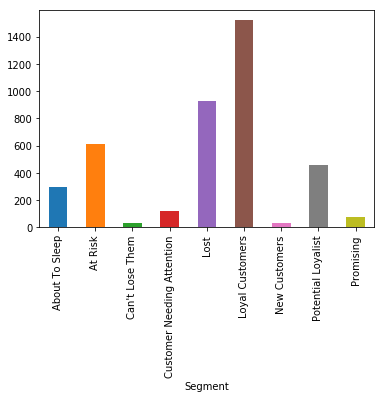

In [274]:
#Overall No of customers by segment
import matplotlib.pyplot as plt
rfmsegmentation_grpby = rfmsegmentation.groupby(['Segment'])['CustomerID'].count()
rfmsegmentation_grpby.plot.bar()
plt.show()

In [325]:
print(rfmsegmentation_grpby)

Segment
About To Sleep                 296
At Risk                        614
Can't Lose Them                 28
Customer Needing Attention     123
Lost                           926
Loyal Customers               1520
New Customers                   31
Potential Loyalist             458
Promising                       78
Name: CustomerID, dtype: int64


## Customer Base and Segmentation Analysis .. End<<<

## Performance Analysis - Find top 20 selling products and bottom 10 selling products..>>>Start

In [275]:
#create the dataframes
conn = sqlite3.connect('C:\\DataSets\\RFMDB.db')
print ("Opened database successfully")
products_perf = pd.read_sql("select StockCode,count(*) as Count from rfmdm group by StockCode order by count(stockcode) desc",conn)
print("dataframe got created successfully")

Opened database successfully
dataframe got created successfully


In [292]:
#Top 20 sellling products
products_perf_top20 = products_perf.head(20)
print("Top 20 selling products")
print(products_perf_top20)

Top 20 selling products
   StockCode  Count
0     85123A   2077
1      22423   1905
2     85099B   1662
3      84879   1418
4      47566   1416
5      20725   1359
6      22720   1232
7      20727   1126
8      22197   1118
9      23203   1115
10     22383   1103
11     21212   1080
12     23209   1040
13     23298   1036
14     22086   1029
15     22382   1021
16     20728   1012
17     22457    997
18     22469    996
19     22384    977


In [293]:
#Bottom 10 sellling products
print("Bottom 10 selling products")
print(products_perf.tail(10))

Bottom 10 selling products
     StockCode  Count
3666    90190A      1
3667    90190B      1
3668    90197B      1
3669    90199B      1
3670    90212B      1
3671    90214O      1
3672    90214T      1
3673    90214U      1
3674    90214W      1
3675    90214Z      1


## Performance Analysis - Find top 20 selling products and bottom 10 selling products..<<<End

## Contribution Analysis..top 10% revenue genrating products..Start>>>

In [278]:
#create the dataframes
conn = sqlite3.connect('C:\\DataSets\\RFMDB.db')
print ("Opened database successfully")
prod_contribution = pd.read_sql("select StockCode, sum(Quantity*UnitPrice) as Revenue from rfmdm group by StockCode order by sum(Quantity*UnitPrice) desc",conn)
print("dataframe got created successfully")

Opened database successfully
dataframe got created successfully


In [279]:
prod_contribution.head()

,StockCode,Revenue
0,22423,132870.40
1,85123A,93979.20
2,85099B,83236.76
3,47566,67687.53
4,84879,56499.22


In [280]:
#do decile analysis
prod_contribution['Decile'] = pd.qcut(prod_contribution['Revenue'], 10, labels=False)
prod_top10_revenue = prod_contribution.loc[prod_contribution['Decile']==9]
prod_top10_revenue.describe()

,Revenue,Decile
count,368.000000,368.0
mean,13506.338098,9.0
std,11845.657967,0.0
min,5807.250000,9.0
25%,7102.112500,9.0
50%,9637.750000,9.0
75%,16013.010000,9.0
max,132870.400000,9.0


In [299]:
prod_top10_revenue_1 = prod_top10_revenue.filter(['StockCode','Revenue'],axis = 1)
print("Examples of top revenue generating products")
print(prod_top10_revenue_1.head())

Examples of top revenue generating products
  StockCode    Revenue
0     22423  132870.40
1    85123A   93979.20
2    85099B   83236.76
3     47566   67687.53
4     84879   56499.22


## Contribution Analysis..End<<<

## Product Affinity Model Building..Start>>>

reference is http://pbpython.com/market-basket-analysis.html
https://towardsdatascience.com/a-gentle-introduction-on-market-basket-analysis-association-rules-fa4b986a40ce

In [ ]:
#create product mart grouped by invoice#

In [122]:
#top 10 selling products by quantity
products_perf.head(10)

,StockCode,Count
0,85123A,2077
1,22423,1905
2,85099B,1662
3,84879,1418
4,47566,1416
5,20725,1359
6,22720,1232
7,20727,1126
8,22197,1118
9,23203,1115


In [123]:
rfmdm_top10products = rfmdm.loc[rfmdm['StockCode'].isin(['85123A','22423','85099B','84879','47566','20725','22720','20727','23203','22383'])]
rfmdm_top10products.head()

,InvoiceNo,StockCode,Quantity,DoP,UnitPrice,CustomerID,Year,Month,TM_Id
0,536365,85123A,6,2010-12-01,2.55,17850,2010,12,2010_12
9,536367,84879,32,2010-12-01,1.69,13047,2010,12,2010_12
48,536373,85123A,6,2010-12-01,2.55,17850,2010,12,2010_12
65,536375,85123A,6,2010-12-01,2.55,17850,2010,12,2010_12
92,536378,20725,10,2010-12-01,1.65,14688,2010,12,2010_12


In [124]:
basket = rfmdm_top10products.groupby(['InvoiceNo','StockCode'])[['Quantity']].count().unstack().reset_index().fillna(0).set_index('InvoiceNo')
basket.head()

Quantity                                                        
StockCode    20725 20727 22383 22423 22720 23203 47566 84879 85099B 85123A
InvoiceNo                                                                 
536365         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0    1.0
536367         0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0    0.0    0.0
536373         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0    1.0
536375         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0    1.0
536378         1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0    0.0

In [125]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units)
basket_sets.tail()

Quantity                                                        
StockCode    20725 20727 22383 22423 22720 23203 47566 84879 85099B 85123A
InvoiceNo                                                                 
C581128          0     0     0     0     0     0     0     0      1      0
C581228          0     0     0     1     0     0     0     0      0      0
C581229          0     0     0     0     0     0     0     0      1      0
C581235          0     0     0     1     0     0     0     0      0      0
C581466          0     0     0     0     1     0     0     0      0      0

In [126]:
basket_sets.describe()

Quantity                                                      \
StockCode        20725        20727        22383        22423        22720   
count      8405.000000  8405.000000  8405.000000  8405.000000  8405.000000   
mean          0.158239     0.127662     0.126472     0.224152     0.144914   
std           0.364987     0.333733     0.332401     0.417048     0.352035   
min           0.000000     0.000000     0.000000     0.000000     0.000000   
25%           0.000000     0.000000     0.000000     0.000000     0.000000   
50%           0.000000     0.000000     0.000000     0.000000     0.000000   
75%           0.000000     0.000000     0.000000     0.000000     0.000000   
max           1.000000     1.000000     1.000000     1.000000     1.000000   

                                                                            
StockCode        23203        47566        84879       85099B       85123A  
count      8405.000000  8405.000000  8405.000000  8405.000000  8405.000000  
mean          0.130518     0.166449     0.164783     0.195479     0.240333  
std           0.336892     0.372505     0.371007     0.396592     0.427311  
min           0.000000     0.000000     0.000000     0.000000     0.000000  
25%           0.000000     0.000000     0.000000     0.000000     0.000000  
50%           0.000000     0.000000     0.000000     0.000000     0.000000  
75%           0.000000     0.000000     0.000000     0.000000     0.000000  
max           1.000000     1.000000     1.000000     1.000000     1.000000

An example of Association Rules

A->B

   Support/confidence

Support shows the frequency of the patterns in the rule; it is the percentage of transactions that contain both A and B, i.e. 

Support = Probability(A and B)
Support = (# of transactions involving A and B) / (total number of transactions).

Confidence is the strength of implication of a rule; it is the percentage of transactions that contain B if they contain A, ie.

Confidence = Probability (B if A) = P(B/A)
Confidence = 
(# of transactions involving A and B) / (total number of transactions that have A).

   
   Assume there are 100 customers
    10 of them bought milk, 8 bought butter and 6 bought both of them.
    bought milk => bought butter
    support = P(Milk & Butter) = 6/100 = 0.06
    
    Support is the relative frequency that the rules show up.In many instances, you may want to look for high support in order to make sure it is a useful relationship. However, there may be instances where a low support is useful if you are trying to find “hidden” relationships.
    
    confidence = support/P(Butter) = 0.06/0.08 = 0.75
    
    Confidence is a measure of the reliability of the rule.This implies that for 75% of the transactions containing milk and butter, the rule is correct.It can also be interpreted as the conditional probability P(Y|X), i.e, the probability of finding the itemset Y in transactions given the transaction already contains X.
It can give some important insights, but it also has a major drawback. It only takes into account the popularity of the itemset X and not the popularity of Y. If Y is equally popular as X then there will be a higher probability that a transaction containing X will also contain Y thus increasing the confidence. To overcome this drawback there is another measure called lift.

    lift = confidence/P(Milk) = 0.75/0.10 = 7.5
    
   Lift is the ratio of the observed support to that expected if the two rules were independent (see wikipedia). The basic rule of thumb is that a lift value close to 1 means the rules were completely independent. Lift values > 1 are generally more “interesting” and could be indicative of a useful rule pattern.
   
   https://rasbt.github.io/mlxtend/user_guide/frequent_patterns/association_rules/
   http://pbpython.com/market-basket-analysis.html

In [127]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
frequent_itemsets = apriori(basket_sets, min_support=0.05, use_colnames=True)

In [128]:
frequent_itemsets.head()

,support,itemsets
0,0.158239,"[(Quantity, 20725)]"
1,0.127662,"[(Quantity, 20727)]"
2,0.126472,"[(Quantity, 22383)]"
3,0.224152,"[(Quantity, 22423)]"
4,0.144914,"[(Quantity, 22720)]"


In [129]:

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules

,antecedants,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"((Quantity, 20725))","((Quantity, 20727))",0.158239,0.127662,0.062225,0.393233,3.080265,0.042024,1.437682
1,"((Quantity, 20727))","((Quantity, 20725))",0.127662,0.158239,0.062225,0.487418,3.080265,0.042024,1.642199
2,"((Quantity, 20725))","((Quantity, 22383))",0.158239,0.126472,0.062582,0.395489,3.127077,0.042569,1.445015
3,"((Quantity, 22383))","((Quantity, 20725))",0.126472,0.158239,0.062582,0.494826,3.127077,0.042569,1.666279
4,"((Quantity, 20725))","((Quantity, 85099B))",0.158239,0.195479,0.051636,0.326316,1.669315,0.020704,1.194211
5,"((Quantity, 85099B))","((Quantity, 20725))",0.195479,0.158239,0.051636,0.264151,1.669315,0.020704,1.143931
6,"((Quantity, 20727))","((Quantity, 22383))",0.127662,0.126472,0.055562,0.435228,3.441293,0.039416,1.546692
7,"((Quantity, 22383))","((Quantity, 20727))",0.126472,0.127662,0.055562,0.439323,3.441293,0.039416,1.555864
8,"((Quantity, 23203))","((Quantity, 85099B))",0.130518,0.195479,0.056276,0.431176,2.205742,0.030763,1.414358
9,"((Quantity, 85099B))","((Quantity, 23203))",0.195479,0.130518,0.056276,0.287888,2.205742,0.030763,1.220991


In [130]:
rules.describe()

,antecedent support,consequent support,support,confidence,lift,leverage,conviction
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.150446,0.150446,0.057656,0.395505,2.704738,0.035095,1.426722
std,0.027534,0.027534,0.004414,0.079380,0.696499,0.008799,0.186146
min,0.126472,0.126472,0.051636,0.264151,1.669315,0.020704,1.143931
25%,0.127662,0.127662,0.055562,0.343045,2.205742,0.030763,1.269333
50%,0.144378,0.144378,0.056276,0.413332,3.080265,0.039416,1.441348
75%,0.158239,0.158239,0.062225,0.438299,3.127077,0.042024,1.553571
max,0.195479,0.195479,0.062582,0.494826,3.441293,0.042569,1.666279


## Product Affinity Model Building..End<<<

## Sales forecasting..start>>>

In [300]:
rfmdm.head()

,InvoiceNo,StockCode,Quantity,DoP,UnitPrice,CustomerID,Year,Month,TM_Id,Revenue
0,536365,85123A,6,2010-12-01,2.55,17850,2010,12,2010_12,15.30
1,536365,71053,6,2010-12-01,3.39,17850,2010,12,2010_12,20.34
2,536365,84406B,8,2010-12-01,2.75,17850,2010,12,2010_12,22.00
3,536365,84029G,6,2010-12-01,3.39,17850,2010,12,2010_12,20.34
4,536365,84029E,6,2010-12-01,3.39,17850,2010,12,2010_12,20.34


In [301]:
rfmdm_salesforecast1 = rfmdm.copy()

In [302]:
rfmdm_salesforecast1.dtypes

InvoiceNo             object
StockCode             object
Quantity               int64
DoP           datetime64[ns]
UnitPrice            float64
CustomerID            object
Year                   int64
Month                  int64
TM_Id                 object
Revenue              float64
dtype: object

In [303]:
rfmdm_salesforecast = rfmdm_salesforecast1.set_index("DoP")
rfmdm_salesforecast.head()

,InvoiceNo,StockCode,Quantity,UnitPrice,CustomerID,Year,Month,TM_Id,Revenue
DoP,,,,,,,,,
2010-12-01,536365,85123A,6,2.55,17850,2010,12,2010_12,15.30
2010-12-01,536365,71053,6,3.39,17850,2010,12,2010_12,20.34
2010-12-01,536365,84406B,8,2.75,17850,2010,12,2010_12,22.00
2010-12-01,536365,84029G,6,3.39,17850,2010,12,2010_12,20.34
2010-12-01,536365,84029E,6,3.39,17850,2010,12,2010_12,20.34


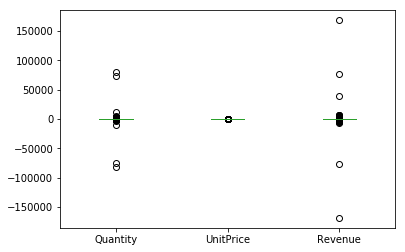

In [304]:
df5 = rfmdm_salesforecast.filter(['Quantity','UnitPrice','Revenue'],axis = 1)
df5.plot.box()
plt.show()

In [305]:
#rfmdm_salesforcast = rfmdm_salesforecast2.loc[(rfmdm_salesforecast2['Revenue'] < 5000)]

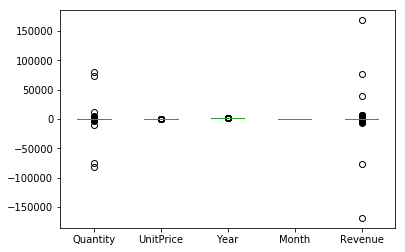

In [306]:
rfmdm_salesforecast.plot.box()
plt.show()

In [328]:
conn = sqlite3.connect('C:\\DataSets\\RFMDB.db')
print ("Opened database successfully")
cursor = conn.cursor()
cursor.execute('''DROP TABLE RFMDM_SALESFORECAST''')
conn.commit()
rfmdm_salesforecast.to_sql('RFMDM_SALESFORECAST',conn, if_exists = 'replace')
#rfmdm = pd.read_sql("select * from RFMDM",conn)
print ("new table got created successfully")
conn.close()

Opened database successfully
new table got created successfully


In [161]:
#rfmdm_salesforecast[rfmdm_salesforecast['Year'] == 2010]
#rfmdm_salesforecast.groupby(['Year','Month'])['Revenue'].mean().plot()
#plt.show()

In [162]:
#rfmdm_salesforecast5 = rfmdm_salesforecast.filter(['DoP','Revenue'], axis = 1)
#rfmdm_salesforecast5.head()

In [163]:
#rfmdm_salesforecast5.index

#reference is https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-visualization-with-python-3
https://stackoverflow.com/questions/17001389/pandas-resample-documentation
http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases

In [309]:
#rfmdm_salesforecast2 = rfmdm_salesforecast1['Revenue'].resample('MS').mean()
#Weekly sampling
rfmdm_salesforecast_W = rfmdm_salesforecast['Revenue'].resample('W').mean()

In [310]:
rfmdm_salesforecast_W

DoP
2010-12-05    18.523294
2010-12-12    21.063573
2010-12-19    21.606119
2010-12-26    22.632995
2011-01-02          NaN
2011-01-09    20.230209
2011-01-16    31.539735
2011-01-23    20.014720
2011-01-30    17.163180
2011-02-06    19.871129
2011-02-13    21.020492
2011-02-20    23.429727
2011-02-27    21.594192
2011-03-06    20.095309
2011-03-13    19.430662
2011-03-20    21.958203
2011-03-27    19.299651
2011-04-03    20.623480
2011-04-10    16.867389
2011-04-17    19.995462
2011-04-24    18.101085
2011-05-01    18.645439
2011-05-08    19.419497
2011-05-15    23.040880
2011-05-22    24.715993
2011-05-29    24.079285
2011-06-05    20.175733
2011-06-12    26.242205
2011-06-19    24.330398
2011-06-26    17.255518
2011-07-03    23.256824
2011-07-10    21.559090
2011-07-17    17.777095
2011-07-24    22.212579
2011-07-31    25.563569
2011-08-07    22.509086
2011-08-14    25.209913
2011-08-21    24.420978
2011-08-28    19.194760
2011-09-04    20.044696
2011-09-11    19.912964
2011-09-18  

In [311]:
#You can use ffill and bfill if need replace NaN values forward and backward filling:

In [312]:
#fill NA value
rfmdm_salesforecast_W = rfmdm_salesforecast_W.fillna(rfmdm_salesforecast5_W.bfill())

In [313]:
rfmdm_salesforecast_W

DoP
2010-12-05    18.523294
2010-12-12    21.063573
2010-12-19    21.606119
2010-12-26    22.632995
2011-01-02    20.230209
2011-01-09    20.230209
2011-01-16    31.539735
2011-01-23    20.014720
2011-01-30    17.163180
2011-02-06    19.871129
2011-02-13    21.020492
2011-02-20    23.429727
2011-02-27    21.594192
2011-03-06    20.095309
2011-03-13    19.430662
2011-03-20    21.958203
2011-03-27    19.299651
2011-04-03    20.623480
2011-04-10    16.867389
2011-04-17    19.995462
2011-04-24    18.101085
2011-05-01    18.645439
2011-05-08    19.419497
2011-05-15    23.040880
2011-05-22    24.715993
2011-05-29    24.079285
2011-06-05    20.175733
2011-06-12    26.242205
2011-06-19    24.330398
2011-06-26    17.255518
2011-07-03    23.256824
2011-07-10    21.559090
2011-07-17    17.777095
2011-07-24    22.212579
2011-07-31    25.563569
2011-08-07    22.509086
2011-08-14    25.209913
2011-08-21    24.420978
2011-08-28    19.194760
2011-09-04    20.044696
2011-09-11    19.912964
2011-09-18  

In [314]:
rfmdm_salesforecast_W.describe()

count    54.000000
mean     20.881578
std       3.088229
min      15.774211
25%      18.730619
50%      20.230209
75%      22.929792
max      31.539735
Name: Revenue, dtype: float64

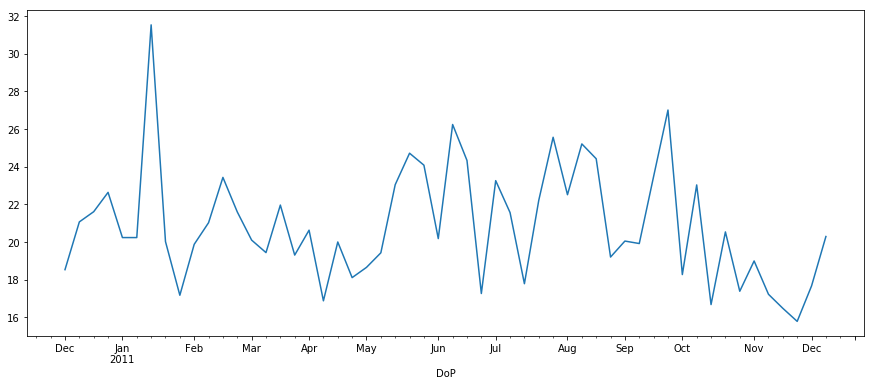

In [315]:
rfmdm_salesforecast_W.plot(figsize=(15,6))
plt.show()

In [316]:
#monthly sampling
rfmdm_salesforecast_M = rfmdm_salesforecast['Revenue'].resample('M').mean()

In [317]:
rfmdm_salesforecast_M

DoP
2010-12-31    20.577732
2011-01-31    21.679865
2011-02-28    21.466015
2011-03-31    20.766517
2011-04-30    18.277439
2011-05-31    22.654068
2011-06-30    23.162258
2011-07-31    21.248616
2011-08-31    22.308043
2011-09-30    22.740859
2011-10-31    19.059671
2011-11-30    17.127686
2011-12-31    19.280173
Freq: M, Name: Revenue, dtype: float64

In [318]:
rfmdm_salesforecast_M.describe()

count    13.000000
mean     20.796072
std       1.864495
min      17.127686
25%      19.280173
50%      21.248616
75%      22.308043
max      23.162258
Name: Revenue, dtype: float64

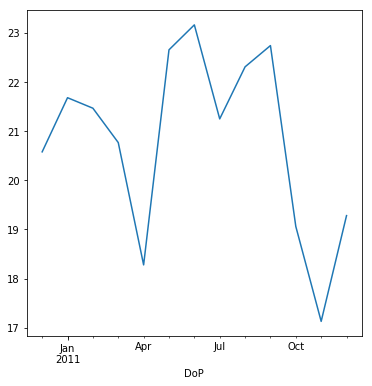

Monthly Sampling


In [326]:
rfmdm_salesforecast_M.plot(figsize=(6,6))
plt.show()
print("Monthly Sampling")

In [320]:
#quarterly sampling
rfmdm_salesforecast_Q = rfmdm_salesforecast['Revenue'].resample('Q').mean()

In [321]:
rfmdm_salesforecast_Q.describe()

count     5.000000
mean     20.745090
std       1.566108
min      18.142645
25%      20.577732
50%      21.255388
75%      21.561014
max      22.188669
Name: Revenue, dtype: float64

In [322]:
rfmdm_salesforecast_Q

DoP
2010-12-31    20.577732
2011-03-31    21.255388
2011-06-30    21.561014
2011-09-30    22.188669
2011-12-31    18.142645
Freq: Q-DEC, Name: Revenue, dtype: float64

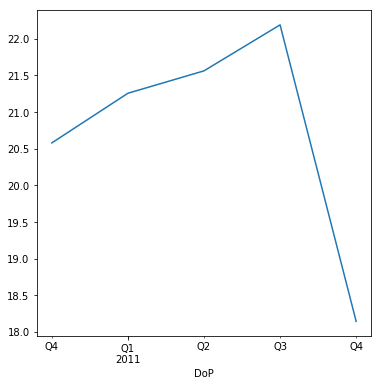

Quarterly Sampling


In [327]:
rfmdm_salesforecast_Q.plot(figsize=(6,6))
plt.show()
print("Quarterly Sampling")

#Ran the following query in sql and found that there were too many returns in the month of Oct'2017 and Nov'2017
select count(*) from RFMDM_SALESFORECAST where TM_ID in ('2011_10','2011_11','2011_12') and revenue < -100
--68
select count(*) from RFMDM_SALESFORECAST where TM_ID in ('2011_10') and revenue < -100
--40
select count(*) from RFMDM_SALESFORECAST where TM_ID in ('2011_11') and revenue < -100
--25
select count(*) from RFMDM_SALESFORECAST where TM_ID in ('2011_12') and revenue < -100
--3

select count(*) from RFMDM_SALESFORECAST where TM_ID in ('2011_07','2011_08','2011_09') and revenue < -100
--0
select count(*) from RFMDM_SALESFORECAST where TM_ID in ('2011_04','2011_05','2011_06') and revenue < -100
--0
select count(*) from RFMDM_SALESFORECAST where TM_ID in ('2011_01','2011_02','2011_03') and revenue < -100
--0

In [179]:
#rfmdm_salesforecast_D = rfmdm_salesforecast["2011-1-2":"2011-1-25"]
#rfmdm_salesforecastD_1 = rfmdm_salesforecast_D['Revenue'].resample('D').mean()
#rfmdm_salesforecastD_1.plot(kind="bar")
#plt.show()

## Sales forecasting..end<<<

## predict repeat customer..start

### predict repeat customer on 4th month, based on 3 months data..training data set..>>>

In [180]:
rfmdm_sf = rfmdm_salesforecast.copy()

In [181]:
rfmdm_sf.head()

,InvoiceNo,StockCode,Quantity,UnitPrice,CustomerID,Year,Month,TM_Id,Revenue
DoP,,,,,,,,,
2010-12-01,536365,85123A,6,2.55,17850,2010,12,2010_12,15.30
2010-12-01,536365,71053,6,3.39,17850,2010,12,2010_12,20.34
2010-12-01,536365,84406B,8,2.75,17850,2010,12,2010_12,22.00
2010-12-01,536365,84029G,6,3.39,17850,2010,12,2010_12,20.34
2010-12-01,536365,84029E,6,3.39,17850,2010,12,2010_12,20.34


In [183]:
rfmdm_sf_jan11_till_mar11 = rfmdm_sf["2011-1":"2011-3"]
rfmdm_sf_jan11_till_mar11.head()

,InvoiceNo,StockCode,Quantity,UnitPrice,CustomerID,Year,Month,TM_Id,Revenue
DoP,,,,,,,,,
2011-01-04,539993,22386,10,1.95,13313,2011,1,2011_1,19.5
2011-01-04,539993,21499,25,0.42,13313,2011,1,2011_1,10.5
2011-01-04,539993,21498,25,0.42,13313,2011,1,2011_1,10.5
2011-01-04,539993,22379,5,2.10,13313,2011,1,2011_1,10.5
2011-01-04,539993,20718,10,1.25,13313,2011,1,2011_1,12.5


In [184]:
rfmdm_sf_jan11_till_mar11.describe()

,Quantity,UnitPrice,Year,Month,Revenue
count,69739.000000,69739.000000,69739.0,69739.000000,69739.000000
mean,12.570656,3.099246,2011.0,2.084013,21.255388
std,400.189025,5.378489,0.0,0.838066,419.838999
min,-74215.000000,0.000000,2011.0,1.000000,-77183.600000
25%,2.000000,1.250000,2011.0,1.000000,5.000000
50%,6.000000,1.950000,2011.0,2.000000,12.500000
75%,12.000000,3.750000,2011.0,3.000000,18.600000
max,74215.000000,295.000000,2011.0,3.000000,77183.600000


#run the following query in sql
drop view RFMDM_SF_JAN11_TILL_MAR11

drop view RFMSEG_JAN11_TILL_MAR11

create view RFMDM_SF_JAN11_TILL_MAR11
AS
select * from rfmdm where TM_ID IN ('2011_1','2011_2','2011_3')

CREATE VIEW RFMSEG_JAN11_TILL_MAR11 
AS
SELECT CustomerID, max(DoP) as RDate, count(distinct(InvoiceNo)) as Frequency, count(distinct(StockCode)) as Product, min(DoP) as TDate, sum(quantity*unitprice) as Monetary, Year, Month, TM_ID FROM RFMDM_SF_JAN11_TILL_MAR11 group by customerid

select * from RFMDM_SF_JAN11_TILL_MAR11

select * from RFMSEG_JAN11_TILL_MAR11

In [188]:
#create the dataframes
conn = sqlite3.connect('C:\\DataSets\\RFMDB.db')
print ("Opened database successfully")
rfmseg_jan11_till_mar11 = pd.read_sql("select * from RFMSEG_JAN11_TILL_MAR11",conn)
print ("records added to dataframe successfully")
conn.close()

Opened database successfully
records added to dataframe successfully


In [193]:
NOW_2011_03 = dt.datetime(2011,4,1)
rfmseg_jan11_till_mar11['NOW'] = NOW_2011_03
rfmseg_jan11_till_mar11['RDate'] = pd.to_datetime(rfmseg_jan11_till_mar11['RDate'])
rfmseg_jan11_till_mar11['TDate'] = pd.to_datetime(rfmseg_jan11_till_mar11['TDate'])
rfmseg_jan11_till_mar11.head()

,CustomerID,RDate,Frequency,Product,TDate,Monetary,Year,Month,TM_Id,NOW,Recency,Tenure
0,12346,2011-01-18,2,1,2011-01-18,0.00,2011,1,2011_1,2011-04-01,73,73
1,12347,2011-01-26,1,29,2011-01-26,475.39,2011,1,2011_1,2011-04-01,65,65
2,12348,2011-01-25,1,5,2011-01-25,187.44,2011,1,2011_1,2011-04-01,66,66
3,12350,2011-02-02,1,16,2011-02-02,294.40,2011,2,2011_2,2011-04-01,58,58
4,12352,2011-03-22,5,24,2011-02-16,521.18,2011,2,2011_2,2011-04-01,10,44


In [194]:
rfmseg_jan11_till_mar11['Recency'] = (rfmseg_jan11_till_mar11['NOW'] - rfmseg_jan11_till_mar11['RDate']).dt.days
rfmseg_jan11_till_mar11['Tenure'] = (rfmseg_jan11_till_mar11['NOW'] - rfmseg_jan11_till_mar11['TDate']).dt.days
rfmseg_jan11_till_mar11.head()

,CustomerID,RDate,Frequency,Product,TDate,Monetary,Year,Month,TM_Id,NOW,Recency,Tenure
0,12346,2011-01-18,2,1,2011-01-18,0.00,2011,1,2011_1,2011-04-01,73,73
1,12347,2011-01-26,1,29,2011-01-26,475.39,2011,1,2011_1,2011-04-01,65,65
2,12348,2011-01-25,1,5,2011-01-25,187.44,2011,1,2011_1,2011-04-01,66,66
3,12350,2011-02-02,1,16,2011-02-02,294.40,2011,2,2011_2,2011-04-01,58,58
4,12352,2011-03-22,5,24,2011-02-16,521.18,2011,2,2011_2,2011-04-01,10,44


In [195]:
rfmseg_jan11_till_mar11.describe()

,Frequency,Product,Monetary,Year,Month,Recency,Tenure
count,1805.000000,1805.000000,1805.000000,1805.0,1805.000000,1805.000000,1805.000000
mean,2.212742,32.580055,821.235191,2011.0,1.860942,32.335180,49.879778
std,2.583453,38.365133,2601.376950,0.0,0.840394,24.727901,26.273473
min,1.000000,1.000000,-811.860000,2011.0,1.000000,1.000000,1.000000
25%,1.000000,11.000000,200.160000,2011.0,1.000000,11.000000,28.000000
50%,1.000000,22.000000,371.350000,2011.0,2.000000,28.000000,53.000000
75%,2.000000,40.000000,775.850000,2011.0,3.000000,51.000000,74.000000
max,36.000000,469.000000,70451.540000,2011.0,3.000000,87.000000,87.000000


In [196]:
rfmseg_jan11_till_mar11_1 = rfmseg_jan11_till_mar11.filter(['CustomerID','Frequency','Recency'], axis=1)
rfmseg_jan11_till_mar11_1.head()
#rfmseg_jan11_till_mar11.plot(kind='hist')
#plt.show()

,CustomerID,Frequency,Recency
0,12346,2,73
1,12347,1,65
2,12348,1,66
3,12350,1,58
4,12352,5,10


#reference for plotting is:
https://www.analyticsvidhya.com/blog/2015/05/data-visualization-python/

In [197]:
quantiles1 = rfmseg_jan11_till_mar11_1.quantile(q=[0.2,0.4,0.6,0.8])
quantiles1

,Frequency,Recency
0.2,1.0,8.0
0.4,1.0,21.0
0.6,2.0,36.0
0.8,3.0,58.2


In [198]:
quantiles1 = quantiles1.to_dict()
quantiles1

{'Frequency': {0.2: 1.0, 0.4: 1.0, 0.6: 2.0, 0.8: 3.0},
 'Recency': {0.2: 8.0, 0.4: 21.0, 0.6: 36.0, 0.8: 58.200000000000045}}

In [199]:
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def RClass(x,p,d):
    if x <= d[p][0.2]:
        return 5
    elif x <= d[p][0.4]:
        return 4
    elif x <= d[p][0.6]: 
        return 3
    elif x <= d[p][0.8]: 
        return 2
    else:
        return 1
    
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FMClass(x,p,d):
    if x <= d[p][0.2]:
        return 1
    elif x <= d[p][0.4]:
        return 2
    elif x <= d[p][0.6]: 
        return 3
    elif x <= d[p][0.8]: 
        return 4
    else:
        return 5

In [200]:
rfmseg_jan11_till_mar11_1['R_Quartile'] = rfmseg_jan11_till_mar11_1['Recency'].apply(RClass, args=('Recency',quantiles,))
rfmseg_jan11_till_mar11_1['F_Quartile'] = rfmseg_jan11_till_mar11_1['Frequency'].apply(FMClass, args=('Frequency',quantiles,))
#rfmseg_jan11_till_mar11_1['M_Quartile'] = rfmseg_jan11_till_mar11_1['Monetary'].apply(FMClass, args=('Monetary',quantiles,))

In [201]:
rfmseg_jan11_till_mar11_1.head()

,CustomerID,Frequency,Recency,R_Quartile,F_Quartile
0,12346,2,73,2,2
1,12347,1,65,3,1
2,12348,1,66,3,1
3,12350,1,58,3,1
4,12352,5,10,5,4


In [204]:
rfmseg_jan11_till_mar11_1.describe()

,Frequency,Recency,R_Quartile,F_Quartile
count,1805.000000,1805.000000,1805.000000,1805.000000
mean,2.212742,32.335180,3.779501,1.873684
std,2.583453,24.727901,0.972528,1.182185
min,1.000000,1.000000,2.000000,1.000000
25%,1.000000,11.000000,3.000000,1.000000
50%,1.000000,28.000000,4.000000,1.000000
75%,2.000000,51.000000,5.000000,2.000000
max,36.000000,87.000000,5.000000,5.000000


In [203]:
conn = sqlite3.connect('C:\\DataSets\\RFMDB.db')
print ("Opened database successfully")
cursor = conn.cursor()
cursor.execute('''DROP TABLE IF EXISTS RFMSEG_JAN11_TILL_MAR11_1''')
conn.commit()
rfmseg_jan11_till_mar11_1.to_sql('RFMSEG_JAN11_TILL_MAR11_1',conn, if_exists = 'replace')
#rfmdm = pd.read_sql("select * from RFMDM",conn)
print ("new table got created successfully")
conn.close()

Opened database successfully
new table got created successfully


In [ ]:
create the following view in sql 
create view RFMDM_2010_12 AS Select * from RFMDM where TM_Id = '2010_12'

create view RFMDM_2011_1 AS Select * from RFMDM where TM_Id = '2011_1'

create view RFMDM_2011_2 AS Select * from RFMDM where TM_Id = '2011_2'

create view RFMDM_2011_3 AS Select * from RFMDM where TM_Id = '2011_3'

create view RFMDM_2011_4 AS Select * from RFMDM where TM_Id = '2011_4'

create view RFMDM_2011_5 AS Select * from RFMDM where TM_Id = '2011_5'

create view RFMDM_2011_6 AS Select * from RFMDM where TM_Id = '2011_6'

create view RFMDM_2011_7 AS Select * from RFMDM where TM_Id = '2011_7'

create view RFMDM_2011_8 AS Select * from RFMDM where TM_Id = '2011_8'

create view RFMDM_2011_9 AS Select * from RFMDM where TM_Id = '2011_9'

create view RFMDM_2011_10 AS Select * from RFMDM where TM_Id = '2011_10'

create view RFMDM_2011_11 AS Select * from RFMDM where TM_Id = '2011_11'

create view RFMDM_2011_12 AS Select * from RFMDM where TM_Id = '2011_12'


In [ ]:
#run the following query in sql
select count(*) from RFMSEG_JAN11_TILL_MAR11_1 where R_Quartile in (4,5) and F_Quartile in (4,5)
-- 225

drop view RFMSEG_JAN11_TILL_MAR11_1_RC

create view RFMSEG_JAN11_TILL_MAR11_1_RC
AS
select * from RFMSEG_JAN11_TILL_MAR11_1 where R_Quartile in (4,5) and F_Quartile in (4,5)

select count(distinct(CustomerId)) from RFMSEG_JAN11_TILL_MAR11_1_RC
--225

select count(distinct(CustomerID)) from RFMDM_2011_4
--896

select count(*) from
RFMSEG_JAN11_TILL_MAR11_1_RC A
where A.CustomerId in (select B.CustomerId from RFMDM_2011_4 B)

--152

152/225*100% = 68% 

In [ ]:
select count(*) from RFMSEG_JAN11_TILL_MAR11_1 where R_Quartile in (5) and F_Quartile in (5)
-- 60

drop view RFMSEG_JAN11_TILL_MAR11_1_RC

create view RFMSEG_JAN11_TILL_MAR11_1_RC
AS
select * from RFMSEG_JAN11_TILL_MAR11_1 where R_Quartile in (5) and F_Quartile in (5)


select count(distinct(CustomerId)) from RFMSEG_JAN11_TILL_MAR11_1_RC
--60

select count(distinct(CustomerID)) from RFMDM_2011_4
--896

select count(*) from
RFMSEG_JAN11_TILL_MAR11_1_RC A
where A.CustomerId in (select B.CustomerId from RFMDM_2011_4 B)

--50

50/60*100% = 83%

In [ ]:
select count(*) from RFMSEG_JAN11_TILL_MAR11_1 where R_Quartile in (5,4) and F_Quartile in (5)
-- 74

drop view RFMSEG_JAN11_TILL_MAR11_1_RC

create view RFMSEG_JAN11_TILL_MAR11_1_RC
AS
select * from RFMSEG_JAN11_TILL_MAR11_1 where R_Quartile in (5,4) and F_Quartile in (5)


select count(distinct(CustomerId)) from RFMSEG_JAN11_TILL_MAR11_1_RC
--74

select count(distinct(CustomerID)) from RFMDM_2011_4
--896

select count(distinct(A.customerID)) from
RFMSEG_JAN11_TILL_MAR11_1_RC A
where A.CustomerId in (select B.CustomerId from RFMDM_2011_4 B)

--63

63/74*100% = 85%

### Predict Repeat customer on 4th month based on 3 months data on traing data set ..End<<<

### Test data - Predict repeat customer on 4th month based on 3 month data..start>>

In [205]:
rfmdm_sf_may11_till_july11 = rfmdm_sf["2011-5":"2011-7"]
rfmdm_sf_may11_till_july11.head()

,InvoiceNo,StockCode,Quantity,UnitPrice,CustomerID,Year,Month,TM_Id,Revenue
DoP,,,,,,,,,
2011-05-01,551515,21731,12,1.65,15606,2011,5,2011_5,19.80
2011-05-01,551515,20749,12,6.35,15606,2011,5,2011_5,76.20
2011-05-01,551515,22729,8,3.75,15606,2011,5,2011_5,30.00
2011-05-01,551515,22998,24,0.42,15606,2011,5,2011_5,10.08
2011-05-01,551515,22665,24,2.55,15606,2011,5,2011_5,61.20


In [206]:
rfmdm_sf_may11_till_july11.describe()

,Quantity,UnitPrice,Year,Month,Revenue
count,83828.000000,83828.000000,83828.0,83828.000000,83828.000000
mean,12.994525,2.974327,2011.0,5.983275,22.363344
std,43.266022,5.320667,0.0,0.818043,150.253846
min,-1515.000000,0.000000,2011.0,5.000000,-1155.000000
25%,2.000000,1.250000,2011.0,5.000000,4.950000
50%,6.000000,1.690000,2011.0,6.000000,12.600000
75%,12.000000,3.750000,2011.0,7.000000,19.800000
max,4300.000000,649.500000,2011.0,7.000000,38970.000000


run the following query in sql 

drop view RFMDM_SF_MAY11_TILL_JULY11

drop view RFMSEG_MAY11_TILL_JULY11

create view RFMDM_SF_MAY11_TILL_JULY11 AS select * from rfmdm where TM_ID IN ('2011_5','2011_6','2011_7')

CREATE VIEW RFMSEG_MAY11_TILL_JULY11 AS SELECT CustomerID, max(DoP) as RDate, count(distinct(InvoiceNo)) as Frequency, count(distinct(StockCode)) as Product, min(DoP) as TDate, sum(quantity*unitprice) as Monetary, Year, Month, TM_ID FROM RFMDM_SF_MAY11_TILL_JULY11 group by customerid

In [207]:
#create the dataframes
conn = sqlite3.connect('C:\\DataSets\\RFMDB.db')
print ("Opened database successfully")
rfmseg_may11_till_july11 = pd.read_sql("select * from RFMSEG_MAY11_TILL_JULY11",conn)
print ("records added to dataframe successfully")
conn.close()

Opened database successfully
records added to dataframe successfully


In [208]:
NOW_2011_08 = dt.datetime(2011,8,1)
rfmseg_may11_till_july11['NOW'] = NOW_2011_08
rfmseg_may11_till_july11['RDate'] = pd.to_datetime(rfmseg_may11_till_july11['RDate'])
rfmseg_may11_till_july11['TDate'] = pd.to_datetime(rfmseg_may11_till_july11['TDate'])
rfmseg_may11_till_july11.head()

,CustomerID,RDate,Frequency,Product,TDate,Monetary,Year,Month,TM_Id,NOW
0,12347,2011-06-09,1,18,2011-06-09,382.52,2011,6,2011_6,2011-08-01
1,12353,2011-05-19,1,4,2011-05-19,89.00,2011,5,2011_5,2011-08-01
2,12355,2011-05-09,1,13,2011-05-09,459.40,2011,5,2011_5,2011-08-01
3,12358,2011-07-12,1,11,2011-07-12,404.86,2011,7,2011_7,2011-08-01
4,12359,2011-06-03,1,47,2011-06-03,1109.32,2011,6,2011_6,2011-08-01


In [209]:
rfmseg_may11_till_july11['Recency'] = (rfmseg_may11_till_july11['NOW'] - rfmseg_may11_till_july11['RDate']).dt.days
rfmseg_may11_till_july11['Tenure'] = (rfmseg_may11_till_july11['NOW'] - rfmseg_may11_till_july11['TDate']).dt.days
rfmseg_may11_till_july11.head()

,CustomerID,RDate,Frequency,Product,TDate,Monetary,Year,Month,TM_Id,NOW,Recency,Tenure
0,12347,2011-06-09,1,18,2011-06-09,382.52,2011,6,2011_6,2011-08-01,53,53
1,12353,2011-05-19,1,4,2011-05-19,89.00,2011,5,2011_5,2011-08-01,74,74
2,12355,2011-05-09,1,13,2011-05-09,459.40,2011,5,2011_5,2011-08-01,84,84
3,12358,2011-07-12,1,11,2011-07-12,404.86,2011,7,2011_7,2011-08-01,20,20
4,12359,2011-06-03,1,47,2011-06-03,1109.32,2011,6,2011_6,2011-08-01,59,59


In [210]:
rfmseg_may11_till_july11.describe()

,Frequency,Product,Monetary,Year,Month,Recency,Tenure
count,2049.000000,2049.000000,2049.000000,2049.0,2049.000000,2049.000000,2049.000000
mean,2.464129,33.370425,914.921615,2011.0,5.664226,37.165935,58.317228
std,3.135733,42.069023,3186.482294,0.0,0.775915,26.176941,25.680844
min,1.000000,1.000000,-432.480000,2011.0,5.000000,1.000000,1.000000
25%,1.000000,11.000000,214.500000,2011.0,5.000000,13.000000,40.000000
50%,2.000000,22.000000,392.400000,2011.0,5.000000,33.000000,66.000000
75%,3.000000,41.000000,792.240000,2011.0,6.000000,57.000000,81.000000
max,57.000000,732.000000,83074.940000,2011.0,7.000000,92.000000,92.000000


In [211]:
rfmseg_may11_till_july11_1 = rfmseg_may11_till_july11.filter(['CustomerID','Frequency','Recency'], axis=1)
rfmseg_may11_till_july11_1.head()

,CustomerID,Frequency,Recency
0,12347,1,53
1,12353,1,74
2,12355,1,84
3,12358,1,20
4,12359,1,59


In [212]:
quantiles2 = rfmseg_may11_till_july11.quantile(q=[0.2,0.4,0.6,0.8])
quantiles2

,Frequency,Product,Monetary,Year,Month,Recency,Tenure
0.2,1.0,9.0,179.102,2011.0,5.0,11.0,33.0
0.4,1.0,18.0,316.960,2011.0,5.0,25.0,55.0
0.6,2.0,28.0,525.108,2011.0,6.0,42.0,73.0
0.8,3.0,48.0,935.298,2011.0,6.0,64.0,83.0


In [213]:
quantiles2 = quantiles2.to_dict()
quantiles2

{'Frequency': {0.2: 1.0, 0.4: 1.0, 0.6: 2.0, 0.8: 3.0},
 'Monetary': {0.2: 179.10199999999998,
  0.4: 316.96000000000004,
  0.6: 525.108,
  0.8: 935.298},
 'Month': {0.2: 5.0, 0.4: 5.0, 0.6: 6.0, 0.8: 6.0},
 'Product': {0.2: 9.0, 0.4: 18.0, 0.6: 28.0, 0.8: 48.0},
 'Recency': {0.2: 11.0, 0.4: 25.0, 0.6: 42.0, 0.8: 64.0},
 'Tenure': {0.2: 33.0, 0.4: 55.0, 0.6: 73.0, 0.8: 83.0},
 'Year': {0.2: 2011.0, 0.4: 2011.0, 0.6: 2011.0, 0.8: 2011.0}}

In [214]:
rfmseg_may11_till_july11_1['R_Quartile'] = rfmseg_may11_till_july11_1['Recency'].apply(RClass, args=('Recency',quantiles,))
rfmseg_may11_till_july11_1['F_Quartile'] = rfmseg_may11_till_july11_1['Frequency'].apply(FMClass, args=('Frequency',quantiles,))

In [215]:
rfmseg_may11_till_july11_1.head()

,CustomerID,Frequency,Recency,R_Quartile,F_Quartile
0,12347,1,53,3,1
1,12353,1,74,2,1
2,12355,1,84,2,1
3,12358,1,20,4,1
4,12359,1,59,3,1


In [216]:
conn = sqlite3.connect('C:\\DataSets\\RFMDB.db')
print ("Opened database successfully")
rfmseg_may11_till_july11_1.to_sql('RFMSEG_MAY11_TILL_JULY11_1',conn, if_exists = 'replace')
#rfmdm = pd.read_sql("select * from RFMDM",conn)
print ("new table got created successfully")
conn.close()

Opened database successfully
new table got created successfully


run the following query in sql

select count(*) from RFMSEG_MAY11_TILL_JULY11_1 where R_Quartile in (5,4) and F_Quartile in (5)

--112

drop view RFMSEG_MAY11_TILL_JULY11_1_RC

create view RFMSEG_MAY11_TILL_JULY11_1_RC AS select * from RFMSEG_MAY11_TILL_JULY11_1 where R_Quartile in (5,4) and F_Quartile in (5)

select count(distinct(CustomerId)) from RFMSEG_MAY11_TILL_JULY11_1_RC 

--112

select count(distinct(CustomerID)) from RFMDM_2011_8 

--977

select count(distinct(A.customerID)) from RFMSEG_MAY11_TILL_JULY11_1_RC A where A.CustomerId in (select B.CustomerId from RFMDM_2011_8 B)

--95

95/112*100 = 85%

87/

### Test data - Predict repeat customer on 4th month based on 3 month data..end<<<